## Breast cancer Tumor Classification

Task: Classify breast tumors into benign or malignant

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
x_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
y_df = pd.DataFrame(data=cancer.target, columns=['Target'])

In [4]:
# Count of individual categories of Data

y_df.Target.value_counts()

1    357
0    212
Name: Target, dtype: int64

In [5]:
# Viewing Data in Dataframe

df_cancer = pd.concat([x_df, y_df], axis=1)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


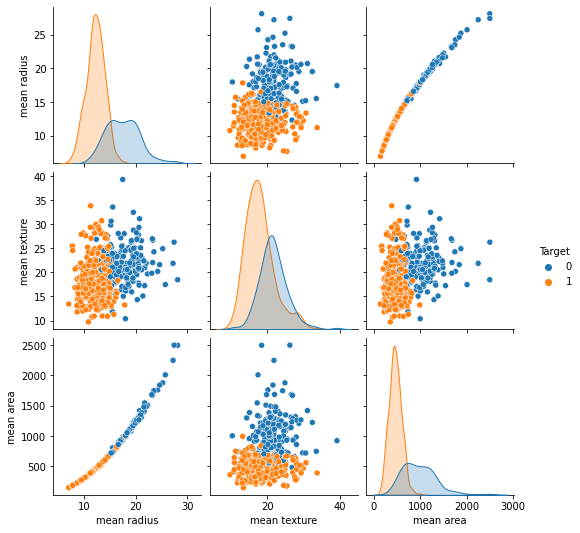

In [6]:
# Viewing the Relationship between features

sns.pairplot(df_cancer,hue='Target', vars=['mean radius', 'mean texture', 'mean area'])

Note:
  1. Orange = Benign
  2. Blue = Malignant

In [7]:
list(df_cancer.columns)


['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'Target']

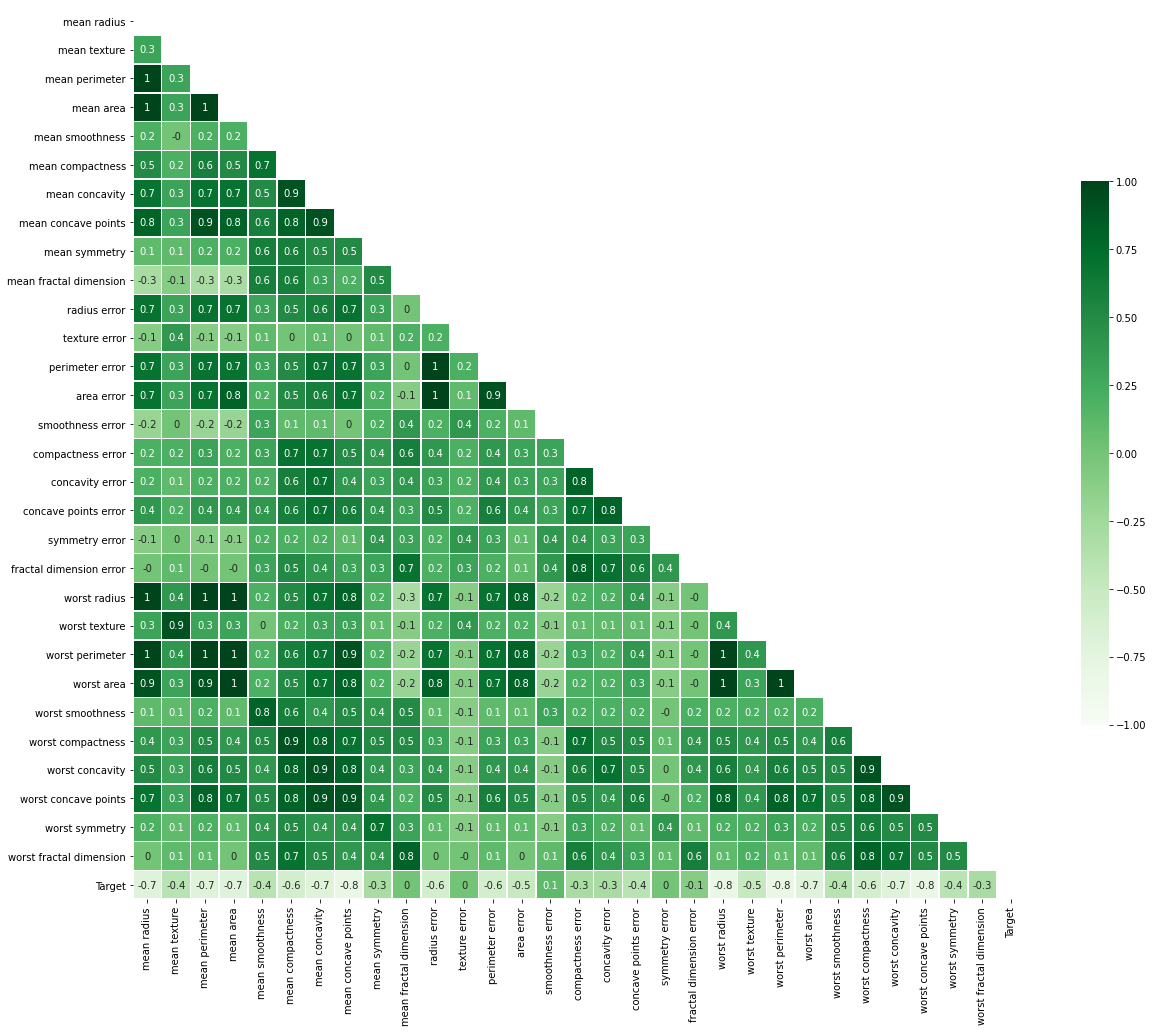

In [8]:
# Correlation between features

cr = df_cancer.corr().round(1)

# setting the upper triangle values as zeros for better visualization
mask = np.zeros_like(cr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(20,20))
sns.heatmap(cr, cmap="Greens", annot=True, vmin = -1, vmax=1, 
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, mask=mask)

There is a strong correlation between mean radius and mean perimeter, as well as mean area and mean perimeter.

### Training and Testing Data
  * “y” = Is the feature we are trying to predict (Output). In this case we are trying to predict if our “target” is cancerous (Malignant) or not (Benign). i.e. we are going to use the “target” feature here.
  * “X” = The predictors which are the remaining columns (mean radius, mean texture, mean perimeter, mean area, mean smoothness, etc.)
Let’s split our data using 80% for training and the remaining 20% for testing.

In [9]:
# Training and Testing

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=42)
print ('The size of our training "X" (input features) is', x_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', x_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (455, 30)


The size of our testing "X" (input features) is (114, 30)


The size of our training "y" (output feature) is (455, 1)


The size of our testing "y" (output features) is (114, 1)


In [10]:
from sklearn.svm import  SVC

svc_model = SVC()

svc_model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
y_predict = svc_model.predict(x_test)

prediction_labels = ['M' if value==0 else 'B' for value in y_predict]


In [12]:
prediction_labels[0:5]

['B', 'M', 'M', 'B', 'B']

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

conf =confusion_matrix(y_test, y_predict)
confusion = pd.DataFrame(conf, columns=['predicted_cancer', 'predicted_healthy'], index=['is_cancer', 'is_healtghy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,37,6
is_healtghy,0,71


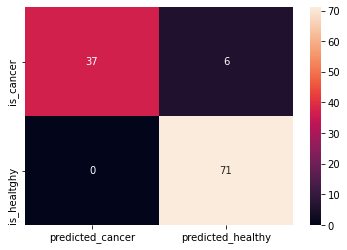

In [14]:
sns.heatmap(confusion, annot=True )

In [15]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [16]:
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy : ', round(accuracy*100, 2), '%') 

Accuracy :  94.74 %


### Improving the Model

In [35]:
from sklearn.preprocessing import StandardScaler

tr_1 = StandardScaler().fit(x_train)
tr_2 = StandardScaler().fit(x_test)

In [36]:
x_train_norm =tr_1.transform(x_train)
x_test_norm =tr_2.transform(x_test)

In [37]:
svc_model.fit(x_train_norm, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
y_predict_norm = svc_model.predict(x_test_norm)

In [39]:
y_predict_norm

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [40]:
conf_norm =confusion_matrix(y_test, y_predict_norm)
confusion_norm = pd.DataFrame(conf_norm, columns=['predicted_cancer', 'predicted_healthy'], index=['is_cancer', 'is_healtghy'])
confusion_norm

,predicted_cancer,predicted_healthy
is_cancer,41,2
is_healtghy,0,71


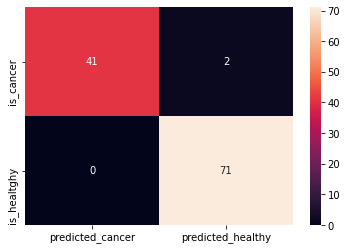

In [41]:
sns.heatmap(confusion_norm, annot=True )

In [42]:
accuracy_norm = accuracy_score(y_test, y_predict_norm)
print('Accuracy : ', round(accuracy_norm*100, 2), '%') 

Accuracy :  98.25 %
